In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("full_data.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [10]:
print("The data set is imbalaced by above observation.")

The data set is imbalaced by above observation.


## EDA

<AxesSubplot:>

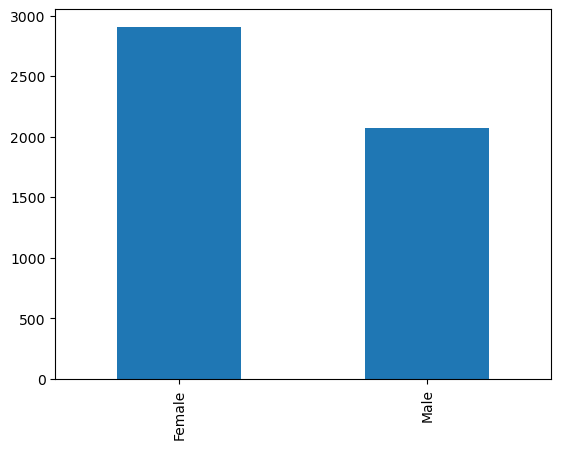

In [11]:
df['gender'].value_counts().plot(kind='bar')

In [12]:
grouped = df.groupby(df.stroke)
df_yes = grouped.get_group(1)
df_yes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4815,Male,79.0,0,0,Yes,Private,Rural,114.77,27.2,formerly smoked,1
4816,Male,74.0,0,0,Yes,Private,Urban,167.13,28.7,Unknown,1
4817,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,31.7,smokes,1
4818,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,28.1,never smoked,1


Text(0.5, 1.0, '0 = never smoked & 1 = formerly smoked & 2 = smokes')

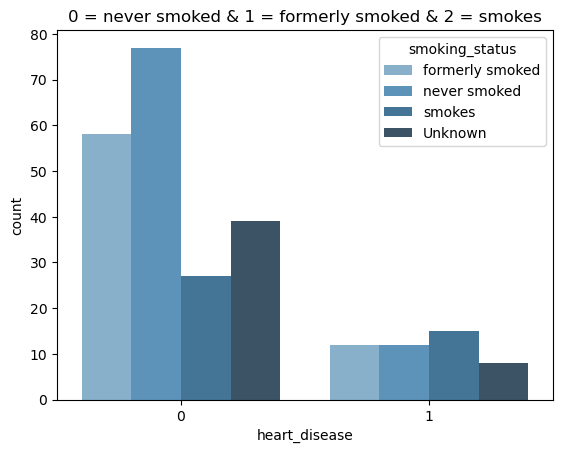

In [13]:
ax = sns.countplot(x="heart_disease", hue = "smoking_status" ,data=df_yes, palette="Blues_d")
plt.title("0 = never smoked & 1 = formerly smoked & 2 = smokes")

In [14]:
df_yes.groupby(['gender', 'work_type']).agg({'work_type': 'count'})

work_type
gender work_type               
Female Govt_job              23
       Private               75
       Self-employed         40
       children               2
Male   Govt_job              10
       Private               73
       Self-employed         25

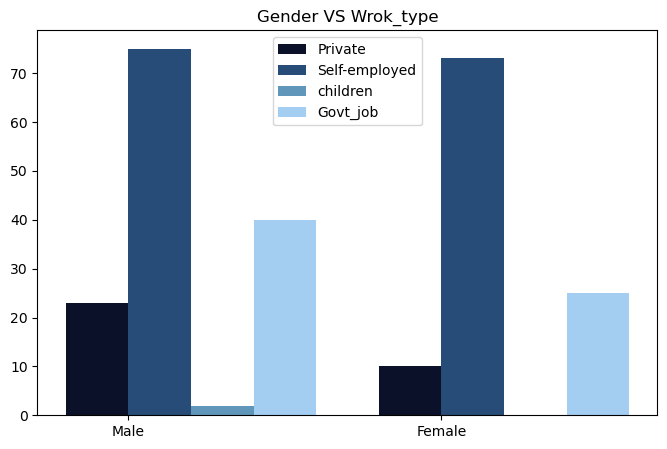

In [15]:
Private = (23,10)         
Self_employed = (75,73)    
children = (2,0)          
Govt_job = (40,25)
X = np.arange(2) 
plt.figure(figsize=(8, 5))
width = 0.20 
plt.bar(X, Private, width, label='Private', color="#0a1128")
plt.bar(X+width, Self_employed, width, label='Self-employed', color="#274c77")
plt.bar(X+2*width, children, width, label='children', color="#6096ba")
plt.bar(X+3* width, Govt_job, width, label='Govt_job', color="#a3cef1")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("Gender VS Wrok_type")
plt.legend(loc='best')

In [16]:
df_yes['Residence_type'].value_counts()

Urban    135
Rural    113
Name: Residence_type, dtype: int64

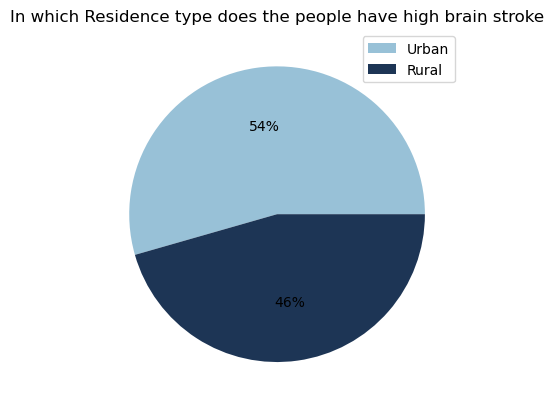

In [17]:
Residence_type=[135, 113]
plt.pie(Residence_type,  radius=1, colors=["#98c1d7", "#1d3555"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('In which Residence type does the people have high brain stroke')
plt.legend(labels=["Urban", "Rural"])

In [18]:
df['gender'] = df['gender'].replace({'Female':0 ,'Male':1})
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1})
df['work_type'] = df['work_type'].replace({'children':0,'Govt_job':1 ,'Private':2,'Self-employed':3})
df['Residence_type'] = df['Residence_type'].replace({'Rural':0 , 'Urban':1})
df['smoking_status'] = df['smoking_status'].replace({'Unknown':0, 'never smoked':1,
                                                     'formerly smoked':2 , 'smokes':3})

In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,2,1
1,1,80.0,0,1,1,2,0,105.92,32.5,1,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,1,1
4,1,81.0,0,0,1,2,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,2,0,70.15,29.8,2,0
4977,1,40.0,0,0,1,2,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,1,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,2,0,83.94,30.0,3,0


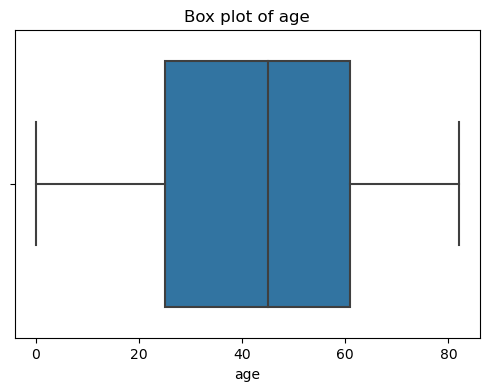

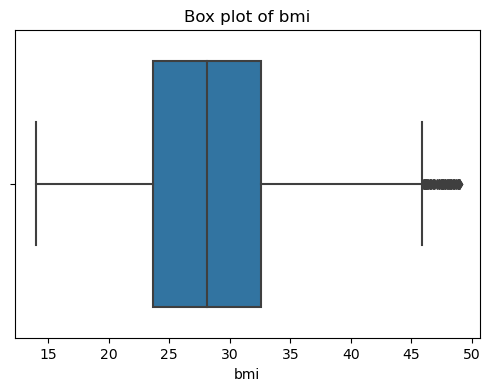

In [20]:
# Function to display outliers using box plots
def display_outliers_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Display outliers and remove them from 'age' column
display_outliers_boxplot(df, 'age')
df = remove_outliers(df, 'age')
df.reset_index(drop=True, inplace=True)

# Display outliers and remove them from 'bmi' column
display_outliers_boxplot(df, 'bmi')
df = remove_outliers(df, 'bmi')
df.reset_index(drop=True, inplace=True)



#### After removing outliers

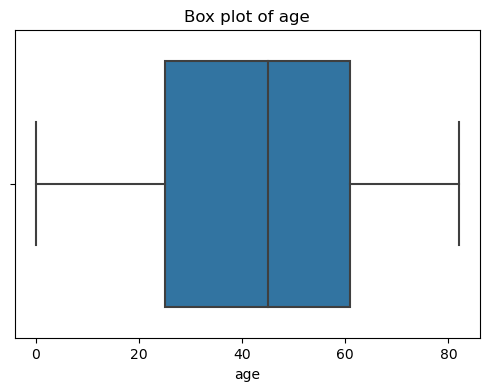

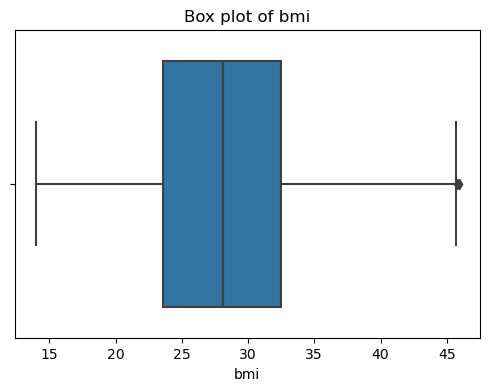

In [21]:
display_outliers_boxplot(df, 'age')
display_outliers_boxplot(df, 'bmi')

<AxesSubplot:>

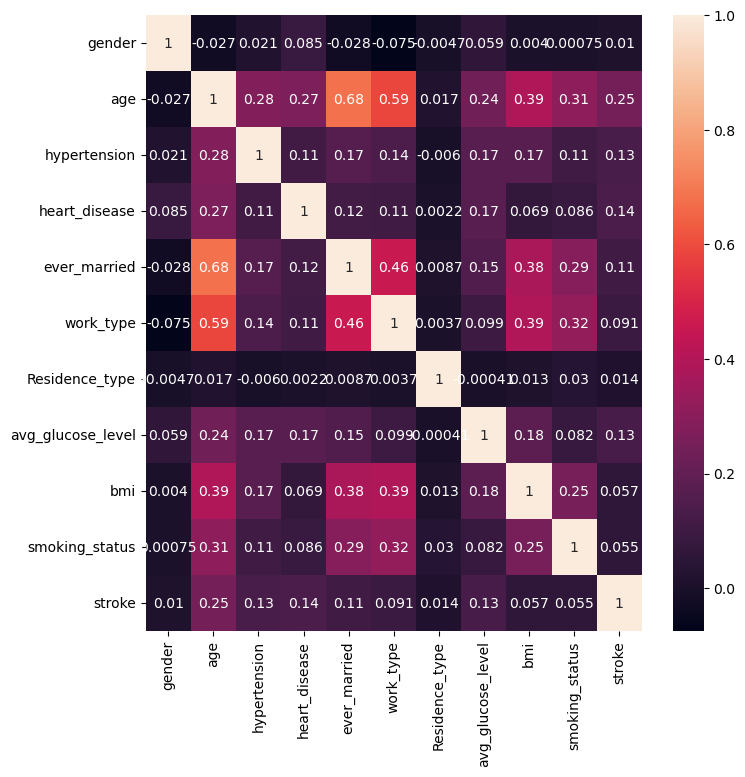

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

## SMOTE


In [23]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [24]:
smote = SMOTE(k_neighbors=5)
x_oversampled,y_oversampled=smote.fit_resample(x,y)

In [25]:
y_oversampled.value_counts()

1    4693
0    4693
Name: stroke, dtype: int64

In [26]:
y.value_counts()

0    4693
1     245
Name: stroke, dtype: int64

In [27]:
x_oversampled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,2
1,1,80.000000,0,1,1,2,0,105.920000,32.500000,1
2,0,49.000000,0,0,1,2,1,171.230000,34.400000,3
3,0,79.000000,1,0,1,3,0,174.120000,24.000000,1
4,1,81.000000,0,0,1,2,1,186.210000,29.000000,2
...,...,...,...,...,...,...,...,...,...,...
9381,0,80.000000,1,0,0,2,0,68.618904,32.865682,1
9382,0,49.650813,0,0,1,2,0,89.441252,28.804756,1
9383,0,54.264812,0,0,1,1,1,65.948326,38.590932,0
9384,0,72.003229,0,0,1,3,1,196.542680,33.618450,2


## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,2,1
1,1,80.0,0,1,1,2,0,105.92,32.5,1,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,1,1
4,1,81.0,0,0,1,2,1,186.21,29.0,2,1


In [30]:
df['stroke'].value_counts()

0    4693
1     245
Name: stroke, dtype: int64

In [31]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [32]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape

((3456, 10), (1482, 10))

In [33]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 3)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

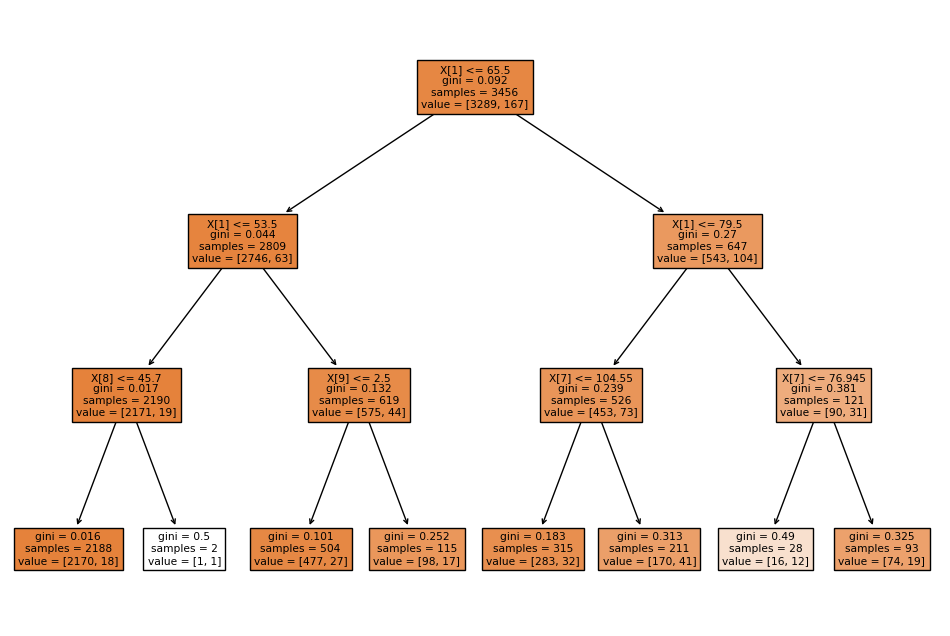

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(clf_gini, filled=True)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_test,y_pred_gini))

[[1404    0]
 [  78    0]]


Confusion Matrix


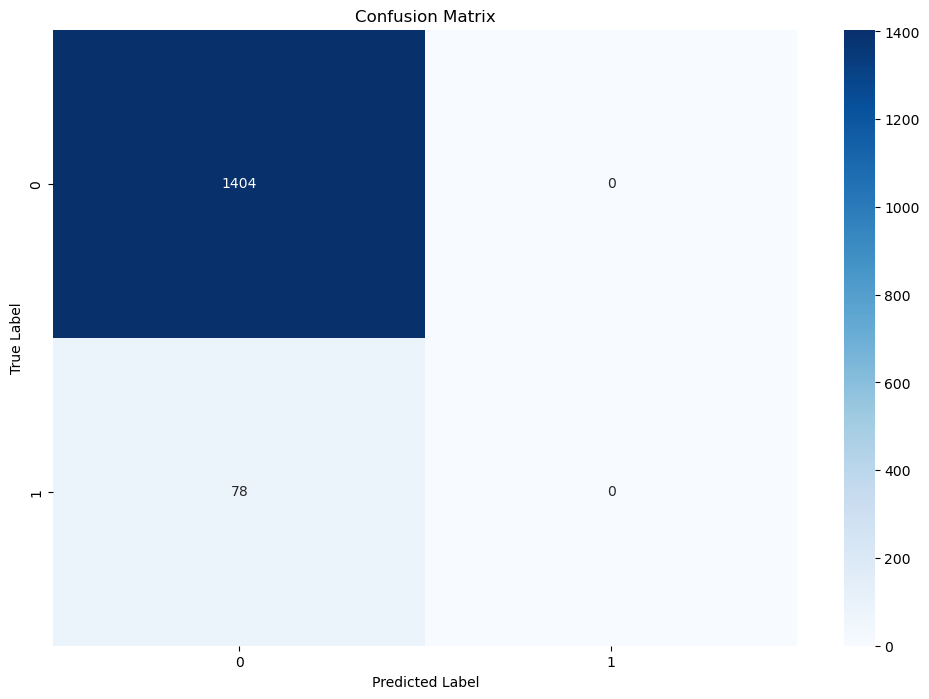

In [37]:
print("\033[1mConfusion Matrix\033[0m")
conf_matrix = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
print('\033[1mThe classification report is:\033[0m\n{:}'.format(classification_report(y_test,y_pred_gini)))

The classification report is:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1404
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1482
   macro avg       0.47      0.50      0.49      1482
weighted avg       0.90      0.95      0.92      1482



In [39]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test,y_pred_gini))

Accuracy
0.9473684210526315


The accuracy of the model is 94%, the confusion matrix and classification report shows that the model prediction is not going to be acceptable as the data is imbalance. The model predicted 78 Flase Negative which means that we did not predict 78 cases which are going to have stroke! so we can apply or train with another model fro better improvement.

### Under sampling the data or Data Balancing

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [41]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
print(sorted(Counter(y_under).items()))

[(0, 245), (1, 245)]


In [42]:
X_train_rs, X_test_rs, y_train_rs , y_test_rs = train_test_split(X_under,y_under, test_size = 0.33, random_state = 43)
X_train_rs.shape, X_test_rs.shape

((328, 10), (162, 10))

In [43]:
clf_gini.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [44]:
y_pred_rs = clf_gini.predict(X_test_rs)

In [45]:
print("\033[1mConfusion Matrix\033[0m")
print(confusion_matrix(y_test_rs,y_pred_rs))

Confusion Matrix
[[59 27]
 [27 49]]


In [46]:
print('\033[1mThe classification report is:\033[0m\n{:}'.format(classification_report(y_test_rs,y_pred_rs)))

The classification report is:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        86
           1       0.64      0.64      0.64        76

    accuracy                           0.67       162
   macro avg       0.67      0.67      0.67       162
weighted avg       0.67      0.67      0.67       162



In [47]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test_rs,y_pred_rs))

Accuracy
0.6666666666666666


Here the accuracy is 74% which is better model can be fit for unseen data.

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train_rs,y_train_rs)

RandomForestClassifier()

In [50]:
y_pred_rfc = rfc.predict(X_test_rs)
print(confusion_matrix(y_test_rs,y_pred_rfc))

[[61 25]
 [18 58]]


In [51]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test_rs,y_pred_rfc))

Accuracy
0.7345679012345679


## Hyper parameter tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [90,100,115,130, 200]
max_depth = range(2,20,1)
min_samples_split = range(2,10,1)
min_samples_leaf = range(1,10,1)
criterion = ['gini']

param = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             criterion = criterion)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param, cv = 5, verbose=2, random_state=42)
rfc_random.fit(X_train_rs, y_train_rs)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criteri

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': range(2, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130,
                                                         200]},
                   random_state=42, verbose=2)

In [53]:
y_pred_rfc_random = rfc_random.predict(X_test_rs)

Confusion Matrix


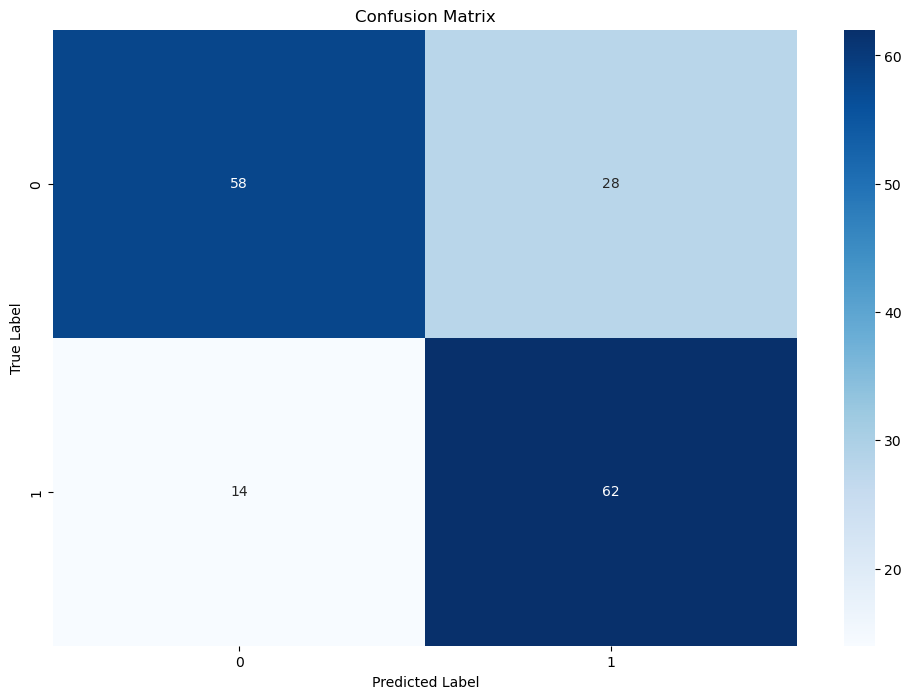

In [54]:
print("\033[1mConfusion Matrix\033[0m")
conf_matrix = confusion_matrix(y_test_rs,y_pred_rfc_random)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test_rs,y_pred_rfc_random))

Accuracy
0.7407407407407407


In [56]:
print('\033[1mThe classification report is:\033[0m\n{:}'.format(classification_report(y_test_rs,y_pred_rfc_random)))

The classification report is:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        86
           1       0.69      0.82      0.75        76

    accuracy                           0.74       162
   macro avg       0.75      0.75      0.74       162
weighted avg       0.75      0.74      0.74       162



We have applied random forest and then apllied hyper parameter tuning using Randomised Search to get the optimized parameters and better accuracy

In [57]:
X_train_as, X_test_as, y_train_as , y_test_as = train_test_split(x_oversampled,y_oversampled, test_size = 0.33, random_state = 43)
X_train_as.shape, X_test_as.shape

((6288, 10), (3098, 10))

## Logestic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_reg=LogisticRegression(random_state=3)
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

In [60]:
print("\033[1mConfusion Matrix\033[0m")
print(confusion_matrix(y_test,log_pred))

Confusion Matrix
[[1404    0]
 [  78    0]]


In [61]:
print('Test-set accuracy score:', log_reg.score(X_test, y_test))

Test-set accuracy score: 0.9473684210526315


After applying smote to data set(oversampling of data set)

In [62]:
log_reg=LogisticRegression(random_state=3)
log_reg.fit(X_train_as,y_train_as)
log_pred_as=log_reg.predict(X_test_as)

In [63]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test_as,log_pred_as))

Accuracy
0.7969657843770175


Accuracy for logaestic regression after applying smote is 81%

## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
model=KNeighborsClassifier() 

In [66]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
res=model.predict(X_test)

In [68]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test,res))

Accuracy
0.941970310391363


Here the accuracy of is 94%.

After applying smote to data set(oversampling of data set)

In [69]:
model.fit(X_train_as, y_train_as)

KNeighborsClassifier()

In [70]:
res_as=model.predict(X_test_as)

In [71]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test_as,res_as))

Accuracy
0.8831504196255648


Confusion Matrix


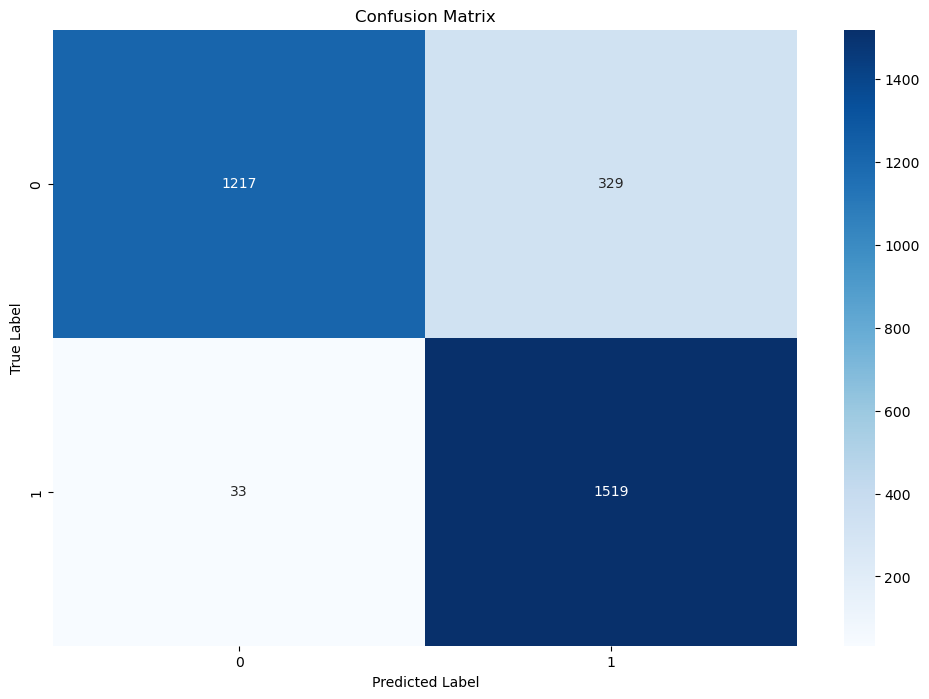

In [72]:
print("\033[1mConfusion Matrix\033[0m")
conf_matrix = confusion_matrix(y_test_as,res_as)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [73]:
print('\033[1mThe classification report is:\033[0m\n{:}'.format(classification_report(y_test_as,res_as)))

The classification report is:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1546
           1       0.82      0.98      0.89      1552

    accuracy                           0.88      3098
   macro avg       0.90      0.88      0.88      3098
weighted avg       0.90      0.88      0.88      3098



Here the accuracy after applying smote is 88%

## SVM

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [75]:
scaler = StandardScaler()
svm_train = scaler.fit_transform(X_train)
svm_test = scaler.transform(X_test)

In [76]:
svm_model = SVC(kernel='linear', C=1.0)

In [77]:
svm_model.fit(svm_train, y_train)

SVC(kernel='linear')

In [78]:
svm_pred = svm_model.predict(svm_test)

In [79]:
print("\033[1mConfusion Matrix\033[0m")
print(confusion_matrix(y_test,svm_pred))

Confusion Matrix
[[1404    0]
 [  78    0]]


In [80]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test,svm_pred))

Accuracy
0.9473684210526315


After applying smote to data set(oversampling of data set)

In [81]:
scaler = StandardScaler()
svm_train_as = scaler.fit_transform(X_train_as)
svm_test_as = scaler.transform(X_test_as)

In [82]:
svm_model.fit(svm_train_as, y_train_as)

SVC(kernel='linear')

In [83]:
svm_pred_as = svm_model.predict(svm_test_as)

In [84]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test_as,svm_pred_as))

Accuracy
0.7953518398967075


Accuracy before applying smote is 94% and after applying smote is 82%.

## XG Boost

In [85]:
import xgboost as xgb

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

In [88]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',  
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

In [89]:
model = xgb.train(params, dtrain, num_boost_round=100)

In [90]:
xg_pred = model.predict(dtest)
xg_pred_binary = np.where(xg_pred > 0.5, 1, 0)

Confusion Matrix


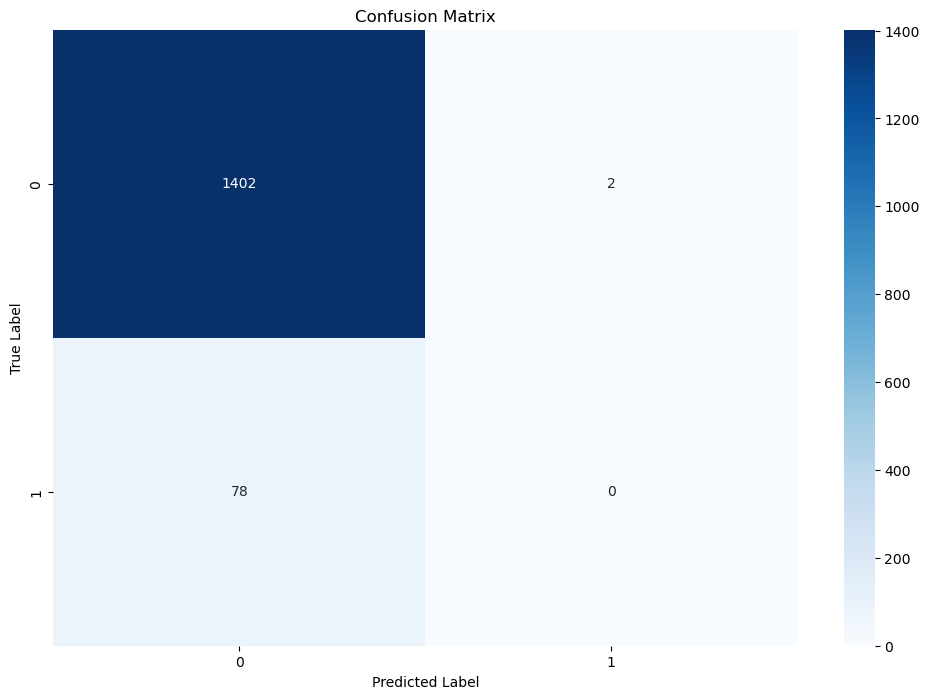

In [91]:
print("\033[1mConfusion Matrix\033[0m")
conf_matrix = confusion_matrix(y_test,xg_pred_binary)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [92]:
print('\033[1mThe classification report is:\033[0m\n{:}'.format(classification_report(y_test,y_pred_gini)))

The classification report is:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1404
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1482
   macro avg       0.47      0.50      0.49      1482
weighted avg       0.90      0.95      0.92      1482



In [93]:
print("\033[1mAccuracy\033[0m")
print(accuracy_score(y_test,xg_pred_binary))

Accuracy
0.9460188933873145


Input=[[gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status]]

In [94]:
Input=np.array([[1],[55],[1],[1],[1],[2],[1],[163.5],[30.6],[3]])

In [95]:
Input_1=np.array([[1,55,0,1,1,3,1,163.5,30.6,3]])

In [96]:
Inputs_1 = np.array(Input_1).reshape(1, -1)

In [97]:
rf_ans_1 = rfc_random.predict(Inputs_1)

In [98]:
print(rf_ans_1)

[1]


In [99]:
Input_2 = np.array([[1,41,0,0,0,2,0,70.0,30.0,2]])

In [100]:
Inputs_2 = np.array(Input_2).reshape(1, -1)

In [101]:
rf_ans_2 = rfc_random.predict(Inputs_2)

In [102]:
print(rf_ans_2)

[0]


In [103]:
xg_1 = xgb.DMatrix(Inputs_1)

In [104]:
xg_ans_1 = model.predict(xg_1)
xg_ans_binary_1 = np.where(xg_ans_1 > 0.5, 1, 0)

In [105]:
print(xg_ans_binary_1)

[0]


In [106]:
xg_2 = xgb.DMatrix(Inputs_2)

In [107]:
xg_ans_2 = model.predict(xg_2)
xg_ans_binary_2 = np.where(xg_ans_2 > 0.5, 1, 0)

In [108]:
print(xg_ans_binary_2)

[0]


In [109]:
text = "\033[1mEnd of the project\033[0m"
centered_text = text.center(120)
print(centered_text)

                                               End of the project                                               
